# Исследование объявлений о продаже квартир

**Цель исследования** - определение факторов, влияющих на изменение стоимости недвижимости в Санкт-Петеребурге с целью применения полученных данных для предотвращения мошеннических действий и отслеживания аномалий. 

**Задачи исследования**:

1. Изучение предоставленных данных;
2. Проведение предобработки данных (выявление пропусков, дубликатов, несоответствия типов данных и т.п.);
3. Выявление аномальных значений;
4. Определение параметров, оказывающих существенное влияние на стоимость недвижимости;
5. Разработка рекомендаций, неообходимых для построения автоматизированной системы поиска аномалий и предотвращения мошеннической деятельности с учетом полученной в ходе исследования информации.

## Изучение данных из файла

Перед началом проведения исследования необходимо открыть и изучить данные.

In [1]:
#импортируем необходимые библиотеки

import pandas as pd

#откроем датасет и выведем его на экран

data = pd.read_csv('/datasets/real_estate_data.csv')
data

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...
...,...
23694,9\t9700000.0\t133.81\t2017-03-21T00:00:00\t3\t...
23695,14\t3100000.0\t59.0\t2018-01-15T00:00:00\t3\t\...
23696,18\t2500000.0\t56.7\t2018-02-11T00:00:00\t2\t\...
23697,13\t11475000.0\t76.75\t2017-03-28T00:00:00\t2\...


Исходя из представленных данных видно, что значения отображаются некорректно. Нобходимо привести данные в порядок, чтобы значения отображались каждое в своем столбце. 

In [2]:
# c помощью параметра sep разделим столбцы и значения в них

data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

#выведем первые 10 строк на экран, чтобы проверить работу параметра sep

data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
#изучим информацию о датасете

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

Исходя из данных датасета и информации о нем, видно, что почти во всех столбцах присутствуют пропуски, которые необходимо правильно обработать. Для оценки стоимости недвижимости возьмем столбцы, значения из которых оказывают, на мой взгляд, наибольшее влияние на стоимость жилья: airport_nearest, balcony, cityCentres_nearest, floor, floors_total, locality_name, parks_nearest, rooms,total_area.

## Предобработка данных

### Поиск и обработка пропусков

In [ ]:
#подсчитаем количество пропусков в датасете и посчитаем процент пропусков

data.isna().sum()*100/len(data)

Из данных о пропусках видно, что в столбцах с интересующими нас данными есть пропуски, и их доля высока: от 8% до 48%. Пропуски есть как в столбцах с количественными данными, так и в столбцах с категориальными данными. Исходя из природы данных, а также для того, чтобы избежать искажения результатов, заменим пропущенные значения на медианные значения в следующих столбцах: ceiling_height, living_area, kitchen_area, airports_nearest, cityCenters_nearest. Пропущенные значения в столбце balcony заменим на 0, т.к. возможно количество не указали из-за их отсутствия и по условиям задания необходимо произвести замену на нулевое значение. 

Пропущенные значения в столбцах со значениями жилой площади, близости к аэропорту, центру города и паркам, площадь кухни и высоты потолков также заполним средними арифметическими значениями.

In [ ]:
#рассчитаем медианное значение жилой площади и округлим значение до сотых

living_area_avr = data['living_area'].median().round(2)

#выведем среднее значение на экран

print('Медианное значение жилой площади составляет:', living_area_avr, 'кв.м')


In [ ]:
#рассчитаем медианное значение площади кухни и округлим значение до сотых

kitchen_area_avr = data['kitchen_area'].median().round(2)

#выведем среднее значение на экран

print('Медианное значение площади кухни составляет:', kitchen_area_avr, 'кв.м')

In [ ]:
#рассчитаем медианное значение близости к аэропорту и округлим до целых

airports_nearest_avr = data['airports_nearest'].median().round()

#выведем среднее значение на экран

print('Медианное значение расстояния до аэропорта составляет:', airports_nearest_avr, 'км')

In [8]:
#рассчитаем медианное значение близости к центру и округлим до целых

cityCenters_nearest_avr =  data['cityCenters_nearest'].median().round()

#выведем среднее значение на экран

print('Медианное значение удаленности от центра составляет:', cityCenters_nearest_avr, 'км')

Медианное значение удаленности от центра составляет: 13098.0 км


In [9]:
#рассчитаем медианное значение высоты потолков и округлим до сотых

ceiling_height_avr = data['ceiling_height'].median().round(2)

#выведем среднее значение на экран

print('Медианное значение высоты потолков составляет:', ceiling_height_avr, 'м')

Медианное значение высоты потолков составляет: 2.65 м


In [10]:
#с помощью метода fillna() заполним все пропущенные количественные значения медианными
#значениями. В качестве параметра передадим данные в виде словаря

data = data.fillna({'living_area':living_area_avr,
            'kitchen_area':kitchen_area_avr,
            'airports_nearest':airports_nearest_avr,
            'cityCenters_nearest':cityCenters_nearest_avr,
            'ceiling_height':ceiling_height_avr})

#выведем первые 10 строк таблицы на экран

data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,30.00,9,NaN,...,9.10,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,26726.0,13098.0,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,30.00,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,26726.0,13098.0,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [11]:
#проверим количество пропущенных значений в столбце 'living_area'

data['living_area'].isna().sum()

0

In [12]:
#проверим количество пропущенных значений в столбце 'ceiling_height'

len(data[data['ceiling_height'].isna()])

0

Поскольку столбец days_exposition используется далее в исследовании, заменим пропущенные значения на нулевые для упрощения проведения дальнейших арифметических действий.

In [13]:
#с помощью метода fillna() заполним пропущенные значения нулевыми
#значениями. В качестве параметра передадим данные в виде словаря

data = data.fillna({'balcony':0,'days_exposition':0})

#выведем первые 10 строк датасета на экран

data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0.0
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,30.00,9,NaN,...,9.10,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,NaN,...,9.10,0.0,городской посёлок Янино-1,26726.0,13098.0,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,30.00,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,0.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,NaN,...,8.81,0.0,посёлок Мурино,26726.0,13098.0,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [14]:
#выборочно провперим количество пропусков в столбце 'days_exposition'

len(data[data['days_exposition'].isna()])

0

In [15]:
#проверим количество пропущенных значений в столбце 'balcony'

data['balcony'].isna().sum()

0

### Вывод

Исходя из полученной информации о наличии пропущенных значений, а также в зависимости от природы данных (категориальные или количественные значения), логики значений, была проведена обработка пропусков: замена на медианные значения там, где это допустимо (значения жилой площади, площади кухни), высота потолков, близость к центру или аэропорту и т.п.), а также замена на нулевые значения, где нет смысла осуществлять какой-либо другой вид замены (количество балконов, дата размещения объявления), поскольку это или никак не поможет в ходе исследования или исказит результаты.

### Поиск и обработка дубликатов

В рамках предобработки данных необходимо выявить наличие дубликатов и правильно их обработать.

In [16]:
#посчитаем количество дубликатов в датасете

data.duplicated().sum()

0

Исходя из подсчета дубликатов мы видим, что они отсутствуют, поэтому в данном случае обрабатывать нечего. Однако необходимо подробно изучить наименования населенных пунктов на наличие ошибок в написании.

In [17]:
#изучим уникальные значения в столбце 'locality_name'

data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Из списка уникальных значений наименований населенных пунктов мы видим, что встречается вариант написания "поселок" и "посёлок". Для корректности дальнейших арифметических действий, необходимо заменить значения на один вариант написания.

In [18]:
#с помощью метода replace() заменим значение 'посёлок' на 'поселок'

data['locality_name'] = data['locality_name'].replace(to_replace = 'посёлок', value = 'поселок', regex = True)

#проверим изменилось ли написание

data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет

### Вывод

Подсчет дубликатов датасета показал нулевой результат, поэтому удалять или обрабатывать нечего. Но в столбце с наименованиями населенных пунктов были замечены два варианта написания слова 'поселок', которые были заменены на один для дальнейшего корректного подсчета значений в указанном столбце.

## Замена типов данных

Для проведения расчетов необходимо убедиться, что все значения соответствуют своему типу данных. Для этого необходимо изучить информацию о типе данных и, в случае несоответствий привести данные в соответствие с типом.

In [19]:
# с помощью метода info() изучим информацию о датасете

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23613 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        23699 non-null float64
cityCenters_nearest     23699 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Как видно из информации о датасете, у нас есть ряд значений с несоответствием типа данных. Например, значения количества балконов (столбец 'balcony') являются данными типа float64, хотя мы не можем сказать, что в квартире может быть 2,35 балкона. По природе данных это должно быть целое число. Однако, стоит помнить о том, что в Pandas число 2.0 несмотря на то, что целое, будет иметь тип данных float64. Но я все-таки заменю данные в этом столбце на целочисленные.  Что касается столбцов 'parks_nearest' и 'ponds_nearest', то полагаю, что это вещественные числа, т.к. эти столбцы отражают расстояние. Поскольку эти данные не участвуют в дальнейших расчетах, то в указанных столбцах замену типа данных производить нет смысла. В столбце days_exposition также заменим тип данных на int64, поскольку эти данные участвуют в исследовании.

In [20]:
#с помощью метода astype() приведем значения типа float64 к типу данных int64
#в качестве параметра передадим данные в виде словаря

data = data.astype({'balcony':'int','days_exposition':'int'})

#проверим изменился ли тип данных после замены

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23613 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        23699 non-null float64
cityCenters_nearest     23699 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000 

В результате работы метода astype(), мы видим, что тип данных в вышеуказанных столбцах изменился с вещественного на целочисленный. 
Также мы видим, что значения в столбце 'first_day_exposition' являются строкой. Поскольку это значения времени, то необходимо привести их к типу данных datetime64.

In [21]:
#приводим значения в столбце 'first_day_exposition' к типу данных datetime64 с помощью
#метода to_datetime()

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format ='%Y-%m-%dT%H:%M:%S')

#проверим изменился ли тип данных

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23613 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        23699 non-null float64
cityCenters_nearest     23699 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_aro

Как видно из информации о таблице, тип данных в столбце со значениями дня размещения объявления теперь имеют тип данных datetime64.

Для простоты проведения расчетов переведем значения удаленности от аэропорта и центра в километры. 

In [22]:
#переведем значения в столбцах 'airports_nearest' и 'cityCenters_nearest' в км

data['airports_nearest'] = data['airports_nearest'] / 1000
data['cityCenters_nearest'] = data['cityCenters_nearest'] / 1000

#выведем первые 10 строк датасета на экран и посмотрим как изменились значения

data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,...,25.00,0,Санкт-Петербург,18.863,16.028,1.0,482.0,2.0,755.0,0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,NaN,...,11.00,2,поселок Шушары,12.817,18.603,0.0,NaN,0.0,NaN,81
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,NaN,...,8.30,0,Санкт-Петербург,21.741,13.933,1.0,90.0,2.0,574.0,558
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,30.00,9,NaN,...,9.10,0,Санкт-Петербург,28.098,6.800,2.0,84.0,3.0,234.0,424
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,...,41.00,0,Санкт-Петербург,31.856,8.098,2.0,112.0,1.0,48.0,121
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,NaN,...,9.10,0,городской поселок Янино-1,26.726,13.098,NaN,NaN,NaN,NaN,55
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,NaN,...,14.40,1,поселок Парголово,52.996,19.143,0.0,NaN,0.0,NaN,155
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,30.00,22,NaN,...,18.90,2,Санкт-Петербург,23.982,11.634,0.0,NaN,0.0,NaN,0
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.43,26,NaN,...,8.81,0,поселок Мурино,26.726,13.098,NaN,NaN,NaN,NaN,189
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,NaN,...,6.50,2,Санкт-Петербург,50.898,15.008,0.0,NaN,0.0,NaN,289


Как видно из датасета, значения в некоторых столбцах ('living_area','ceiling_height' и др.) имеют дробные значения. Для удобства округлим значения до целых или до сотых в зависимости от характера значений.

In [23]:
#с помощью метода round() окгруглим значения в ряде столбцов датасета
#значения передадим в качестве параметра в виде словаря

data = data.round(({'living_area': 2,
            'ceiling_height': 2,
            'balcony': 0,
            'kitchen_area': 2,
            'airports_nearest': 2,
            'cityCenters_nearest': 2,
            'floors_total': 0,
            'days_exposition': 0}))

#выведем первые 10 строк таблицы на экран

data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,...,25.00,0,Санкт-Петербург,18.86,16.03,1.0,482.0,2.0,755.0,0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,NaN,...,11.00,2,поселок Шушары,12.82,18.60,0.0,NaN,0.0,NaN,81
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,NaN,...,8.30,0,Санкт-Петербург,21.74,13.93,1.0,90.0,2.0,574.0,558
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,30.00,9,NaN,...,9.10,0,Санкт-Петербург,28.10,6.80,2.0,84.0,3.0,234.0,424
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,...,41.00,0,Санкт-Петербург,31.86,8.10,2.0,112.0,1.0,48.0,121
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,NaN,...,9.10,0,городской поселок Янино-1,26.73,13.10,NaN,NaN,NaN,NaN,55
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,NaN,...,14.40,1,поселок Парголово,53.00,19.14,0.0,NaN,0.0,NaN,155
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,30.00,22,NaN,...,18.90,2,Санкт-Петербург,23.98,11.63,0.0,NaN,0.0,NaN,0
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.43,26,NaN,...,8.81,0,поселок Мурино,26.73,13.10,NaN,NaN,NaN,NaN,189
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,NaN,...,6.50,2,Санкт-Петербург,50.90,15.01,0.0,NaN,0.0,NaN,289


### Вывод

В результате изучения информации о типах данных было замечено, что значения в некоторых столбцах (количество балконов, время размещения первой публикации) не соответствуют типу данных. Значения в указанных столбцах были приведены к необходимому типу данных, что теперь не мешает дальнейшему проведению исследования.

## Расчёты и добавление результатов в таблицу

Для дальнейшего анализа факторов, влияющих на стоимость жилья, необходим рассчитать и внести в таблицу ряд параметров: 
- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры: варианты - первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей. 

In [24]:
#рассчитаем цену квадратного метра недвижимости и добавим данные в новый столбец 'sqm_price'

data['sqm_price'] = (data['last_price'] / data['total_area']).round(2)

#выведем на экран первые 10 строк таблицы для проверки добавления столбца 

data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqm_price
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,...,0,Санкт-Петербург,18.86,16.03,1.0,482.0,2.0,755.0,0,120370.37
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,NaN,...,2,поселок Шушары,12.82,18.60,0.0,NaN,0.0,NaN,81,82920.79
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,NaN,...,0,Санкт-Петербург,21.74,13.93,1.0,90.0,2.0,574.0,558,92785.71
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,30.00,9,NaN,...,0,Санкт-Петербург,28.10,6.80,2.0,84.0,3.0,234.0,424,408176.10
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,...,0,Санкт-Петербург,31.86,8.10,2.0,112.0,1.0,48.0,121,100000.00
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,NaN,...,0,городской поселок Янино-1,26.73,13.10,NaN,NaN,NaN,NaN,55,95065.79
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,NaN,...,1,поселок Парголово,53.00,19.14,0.0,NaN,0.0,NaN,155,99195.71
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,30.00,22,NaN,...,2,Санкт-Петербург,23.98,11.63,0.0,NaN,0.0,NaN,0,110544.69
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.43,26,NaN,...,0,поселок Мурино,26.73,13.10,NaN,NaN,NaN,NaN,189,87454.76
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,NaN,...,2,Санкт-Петербург,50.90,15.01,0.0,NaN,0.0,NaN,289,88524.59


In [25]:
#добавим в датасет новые столбцы с указанием дня недели, месяца и года публикации объявления

data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

#просмотрим первые 10 строк таблицы, чтобы убедиться, что столбцы добавлены 

data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqm_price,weekday,month,year
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,...,16.03,1.0,482.0,2.0,755.0,0,120370.37,3,3,2019
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,NaN,...,18.60,0.0,NaN,0.0,NaN,81,82920.79,1,12,2018
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,NaN,...,13.93,1.0,90.0,2.0,574.0,558,92785.71,3,8,2015
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,30.00,9,NaN,...,6.80,2.0,84.0,3.0,234.0,424,408176.10,4,7,2015
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,...,8.10,2.0,112.0,1.0,48.0,121,100000.00,1,6,2018
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,NaN,...,13.10,NaN,NaN,NaN,NaN,55,95065.79,0,9,2018
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,NaN,...,19.14,0.0,NaN,0.0,NaN,155,99195.71,3,11,2017
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,30.00,22,NaN,...,11.63,0.0,NaN,0.0,NaN,0,110544.69,3,4,2019
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.43,26,NaN,...,13.10,NaN,NaN,NaN,NaN,189,87454.76,2,5,2018
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,NaN,...,15.01,0.0,NaN,0.0,NaN,289,88524.59,6,2,2017


Для того, чтобы добавить в таблицу информацию об этажности, нам необходимо создать три категории по этажам: первый, последний и другой. Для этого напишем функцию.

In [26]:
#объявим функцию floor_function для строки датасета с целью категоризации значений этажности

def floor_function(row):
        if row['floor'] == 1 :#объявляем первое условие
            return 'Первый' #возвращаем полученное значение
        if row['floor'] == row['floors_total']:
            return 'Последний'
        return 'Другой'
               
#применяем результат работы функции floor_function для всего датасета. Полученные данные
#передаем в новый столбец 'floor_level'

data['floor_level'] = data.apply(floor_function, axis = 1)

#выведем первые 10 строк таблицы для проверки полученного результата

data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqm_price,weekday,month,year,floor_level
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,...,1.0,482.0,2.0,755.0,0,120370.37,3,3,2019,Другой
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,NaN,...,0.0,NaN,0.0,NaN,81,82920.79,1,12,2018,Первый
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,NaN,...,1.0,90.0,2.0,574.0,558,92785.71,3,8,2015,Другой
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,30.00,9,NaN,...,2.0,84.0,3.0,234.0,424,408176.10,4,7,2015,Другой
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,...,2.0,112.0,1.0,48.0,121,100000.00,1,6,2018,Другой
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,NaN,...,NaN,NaN,NaN,NaN,55,95065.79,0,9,2018,Другой
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,NaN,...,0.0,NaN,0.0,NaN,155,99195.71,3,11,2017,Другой
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,30.00,22,NaN,...,0.0,NaN,0.0,NaN,0,110544.69,3,4,2019,Другой
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.43,26,NaN,...,NaN,NaN,NaN,NaN,189,87454.76,2,5,2018,Другой
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,NaN,...,0.0,NaN,0.0,NaN,289,88524.59,6,2,2017,Другой


In [27]:
#посчитаем соотношение жилой и общей площади и округлим значения до сотых.
#результат поместим в новый столбец 'living_total_area_ratio'

data['living_total_area_ratio'] = (data['living_area'] / data['total_area']).round(2)

#выведем значения столбца 'living_total_area_ratio' на экран

data['living_total_area_ratio']

0        0.47
1        0.46
2        0.61
3        0.19
4        0.32
         ... 
23694    0.55
23695    0.64
23696    0.52
23697    0.39
23698    0.38
Name: living_total_area_ratio, Length: 23699, dtype: float64

In [28]:
#посчитаем соотношение площади кухни и общей площади, и округлим значения до сотых.
#результат поместим в новый столбец 'kitchen_total_area_ratio'

data['kitchen_total_area_ratio'] = (data['kitchen_area'] / data['total_area']).round(2)

#выведем значения столбца 'kitchen_total_area_ratio' на экран

data['kitchen_total_area_ratio']


0        0.23
1        0.27
2        0.15
3        0.06
4        0.41
         ... 
23694    0.10
23695    0.14
23696    0.16
23697    0.30
23698    0.28
Name: kitchen_total_area_ratio, Length: 23699, dtype: float64

In [29]:
#просмотрим первые 10 строк датасета

data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,sqm_price,weekday,month,year,floor_level,living_total_area_ratio,kitchen_total_area_ratio
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,...,2.0,755.0,0,120370.37,3,3,2019,Другой,0.47,0.23
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,NaN,...,0.0,NaN,81,82920.79,1,12,2018,Первый,0.46,0.27
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,NaN,...,2.0,574.0,558,92785.71,3,8,2015,Другой,0.61,0.15
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,30.00,9,NaN,...,3.0,234.0,424,408176.10,4,7,2015,Другой,0.19,0.06
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,...,1.0,48.0,121,100000.00,1,6,2018,Другой,0.32,0.41
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,NaN,...,NaN,NaN,55,95065.79,0,9,2018,Другой,0.47,0.30
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,NaN,...,0.0,NaN,155,99195.71,3,11,2017,Другой,0.28,0.39
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,30.00,22,NaN,...,0.0,NaN,0,110544.69,3,4,2019,Другой,0.42,0.26
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.43,26,NaN,...,NaN,NaN,189,87454.76,2,5,2018,Другой,0.47,0.27
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,NaN,...,0.0,NaN,289,88524.59,6,2,2017,Другой,0.71,0.11


In [30]:
#для удобства расчетов переведем значения стоимости квартир в тыс.руб.

data['last_price'] = (data['last_price']  / 1000).round(3)

#выведем первые 10 строк таблицы на экран

data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,sqm_price,weekday,month,year,floor_level,living_total_area_ratio,kitchen_total_area_ratio
0,20,13000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,...,2.0,755.0,0,120370.37,3,3,2019,Другой,0.47,0.23
1,7,3350.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,NaN,...,0.0,NaN,81,82920.79,1,12,2018,Первый,0.46,0.27
2,10,5196.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,NaN,...,2.0,574.0,558,92785.71,3,8,2015,Другой,0.61,0.15
3,0,64900.0,159.00,2015-07-24,3,2.65,14.0,30.00,9,NaN,...,3.0,234.0,424,408176.10,4,7,2015,Другой,0.19,0.06
4,2,10000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,...,1.0,48.0,121,100000.00,1,6,2018,Другой,0.32,0.41
5,10,2890.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,NaN,...,NaN,NaN,55,95065.79,0,9,2018,Другой,0.47,0.30
6,6,3700.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,NaN,...,0.0,NaN,155,99195.71,3,11,2017,Другой,0.28,0.39
7,5,7915.0,71.60,2019-04-18,2,2.65,24.0,30.00,22,NaN,...,0.0,NaN,0,110544.69,3,4,2019,Другой,0.42,0.26
8,20,2900.0,33.16,2018-05-23,1,2.65,27.0,15.43,26,NaN,...,NaN,NaN,189,87454.76,2,5,2018,Другой,0.47,0.27
9,18,5400.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,NaN,...,0.0,NaN,289,88524.59,6,2,2017,Другой,0.71,0.11


### Вывод

Для дальнейшего проведения анализа в таблицу были добавлены следующие значения: 
- рассчитана цена квадратного метра жилья;
- определены день, месяц и год публикации объявлений;
- категоризированы данные по этажности;
- посчитано соотношение жилой и общей площади, площади кухни и общей площади.

Теперь у нас есть все данные для опеределения факторов, влияющих на изменение стоимости недвижимости.

## Исследовательский анализ данных

### Изучение основных параметров

Для определения параметров, влияющих на стоимость недвижимости в Санкт-Петербурге, необходимо изучить следующие параметры: площадь, цена, число комнат, высота потолков.

In [31]:
#изучим информацию об общей площади

data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Исходя из информации об общей площади мы видим, что стандартное отклонение существенно отличается от среднего значения (35 кв.м и 60 соответственно), что свидетельствует о возможном существовании аномальных значений. Для дальнейшего изучения данного параметра построим два графика: "ящик с усами" и гистограмму.

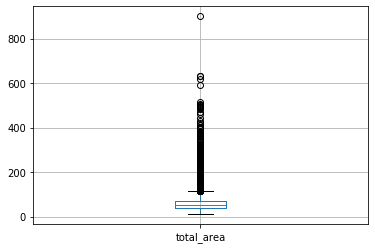

In [32]:
#импортируем бибилиотеку matplotlib.pyplot

import matplotlib.pyplot as plt

#построим график "ящик с усами" для значений общей площади

data.boxplot(column = 'total_area')

#выведем график на экран

plt.show()

Исходя из графика мы видим, что основная часть значений находится в диапазоне 40-65 кв.м. Однако есть значения, которые можно считать выбросами (590 кв.м. и выше). Для наглядности построим гистограмму.

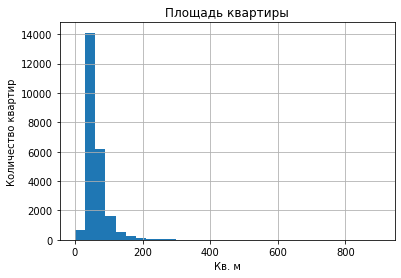

In [33]:
#построим гистограмму, максимально значение укажем исходя из информации о датафрейме

data['total_area'].hist(bins=30, range=(0,900))
plt.title('Площадь квартиры') #добавим подпись для графика
plt.xlabel('Кв. м') #добавим подписи осей
plt.ylabel('Количество квартир')

#выведем гистограмму на экран

plt.show()

Гистограмма визуально понятнее показывает распределение значений общей площади. По ней также можно сказать, что основная часть квартир приходится на те, площадь которых составляет 40-65 кв.м.

In [34]:
#изучим информацию о стоимости квартир

data['last_price'].describe()

count     23699.000000
mean       6541.548772
std       10887.013268
min          12.190000
25%        3400.000000
50%        4650.000000
75%        6800.000000
max      763000.000000
Name: last_price, dtype: float64

Информация о стоимости квартир показывает, что стандартное отклонение также значительно отличается от среднего значения стоимости квартир (10,9 млн руб. и 6,5 млн руб. соответственно). Необходимо построить графики, чтобы понять в чем дело.

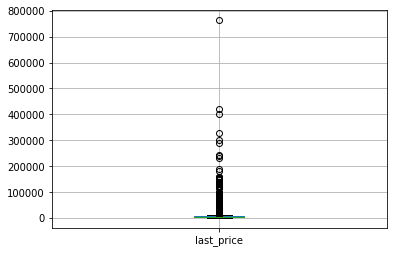

In [35]:
#построим график "ящик с усами"

data.boxplot(column = 'last_price')

#выведем график на экран

plt.show()

Исходя из графика квартили видно плохо, зато мы видим, что есть явные выбросы значений квартир дороже 20 млн. руб. Для наглядности построим гистограмму.

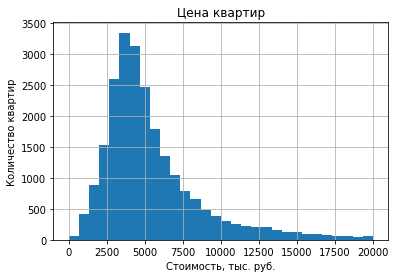

In [36]:
#построим гистограмму, максимальное значение берем исходя из данных предыдущего графика

data['last_price'].hist(bins=30, range=(0,20000))
plt.title('Цена квартир') #укажем название графика
plt.xlabel('Стоимость, тыс. руб.') #укажем подписи осей
plt.ylabel('Количество квартир')

#выведем график на экран

plt.show()

Гистограмма показывает, что наиболее часто встречающиеся значения приходятся на 3,5-5 млн.руб., затем значения стоимости квартир плавно снижаются. 

In [37]:
#отсортируем наиболее часто встречающиеся значения стоимости квартир по убыванию

data['last_price'].sort_values(ascending=False)

#выведем на экран первые 20 значений

data['last_price'].head(20)

0     13000.0
1      3350.0
2      5196.0
3     64900.0
4     10000.0
5      2890.0
6      3700.0
7      7915.0
8      2900.0
9      5400.0
10     5050.0
11     3300.0
12     3890.0
13     3550.0
14     4400.0
15     4650.0
16     6700.0
17     4180.0
18     3250.0
19    14200.0
Name: last_price, dtype: float64

Из данных видно, что распределение неоднородное, поскольку встречаются аномальные значения (64,9 млн руб.).

In [38]:
#изучим информацию о количестве комнат

data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Из данных видно, что макисмальное значение комнат - 19. Скорее всего его можно считать выбросом. Чтобы убедиться в этом, построим графики.

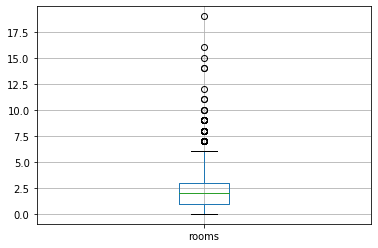

In [39]:
#построим график "ящик с усами"

data.boxplot(column = 'rooms')

#выведем график на экран

plt.show()

Из графика мы видим, что среднее значение комнат - 2, также встречаются комнаты с 7 и более комнатами. Такие варианты недвижимости возможны, но все, что более 7 - это скорее это выбросы. Для наглядности построим еще гистограмму.

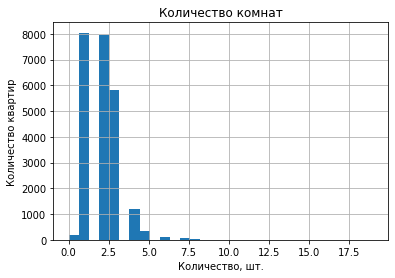

In [40]:
#построим гистограмму, максимальное значение задаем исходя из информации о количестве комнат

data['rooms'].hist(bins = 30, range = (0,19))
plt.title('Количество комнат') #добавляем название графика
plt.xlabel('Количество, шт.') #добавляем подписи осей
plt.ylabel('Количество квартир')

#выводим график на экран

plt.show()

Из графика видно, что чаще всего встречаются однокомнатные квартиры, затем уже двухкомнатные. Объявления о продаже трех- и более комнатных квартир встречаются гораздо реже.

In [41]:
#изучим информацию о высоте потолков

data['ceiling_height'].describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Из представленных данных видно, что среднее отклонение значительно отличается от среднего значения высоты потолка (0,98 и 2,77 соответственно), что говорит о наличии выбросов. Максимальное значение (100 м) явно является аномальным значением.

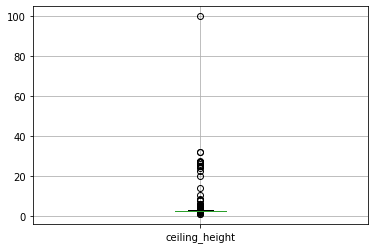

In [42]:
#построим график "ящик с усами"

data.boxplot(column = 'ceiling_height')

#выведем график на экран

plt.show()

Как и следовало ожидать, 100 м - это выброс, который необходимо учитывать при проведении дальнейших расчетов.

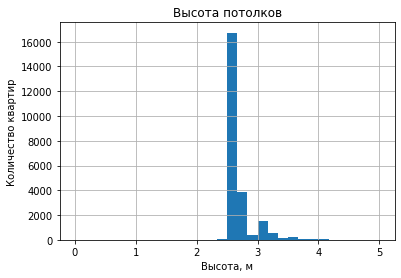

In [43]:
#построим гистограмму, максимальное значение берем исходя из логики значений

data['ceiling_height'].hist(bins = 30, range = (0,5))
plt.title('Высота потолков') #добавляем название графика
plt.xlabel('Высота, м') #добавляем подписи осей
plt.ylabel('Количество квартир')

#выведем график на экран

plt.show()

Из графика видно, что наиболее часто встречающиеся значения высоты потолков находятся в районе 2,8 м. Потолки высотой более 3 метров встречаются гораздо реже.

In [44]:
#изучим информацию о времени продажи квартир

data['days_exposition'].describe()

count    23699.000000
mean       156.608844
std        213.546873
min          0.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

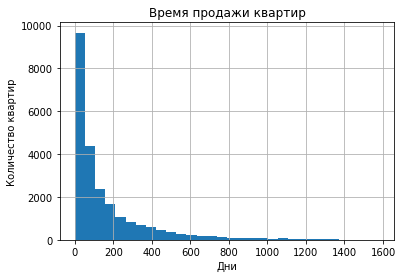

In [45]:
#построим гистограмму

data['days_exposition'].hist(bins = 30, range = (0,1580))
plt.title('Время продажи квартир') #добавляем название графика
plt.xlabel('Дни') #добавляем подписи осей
plt.ylabel('Количество квартир')

#выведем график на экран

plt.show()

Исходя из данных о времени продажи квартир, а также построенной гистограммы, видно, что чаще всего квартиры продаются в срок до 60 дней. Быстрое время продажи - 22 дня (значение первого квартиля), долгое - 200 и более дней. Также встречются и выбросы. Аномальное время продажи квартиры - это 1580 дней.

In [46]:
#посчитаем среднее значение времени продажи квартир и приведем его к целочисленному значению

days_exposition_avr = data['days_exposition'].mean().astype('int')

#выведем результат расчета на экран

print('Среднее время продажи квартиры составляет:', days_exposition_avr, 'дней')

Среднее время продажи квартиры составляет: 156 дней


In [47]:
#ассчитаем медианное время продажи квартир и приведем значение к целочисленному

days_exposition_med = data['days_exposition'].median().astype('int')

#выведем результат расчета на экран

print('Медианное время продажи квартиры составляет:', days_exposition_med, 'дня')

Медианное время продажи квартиры составляет: 74 дня


### Вывод

Исходя из изученных параметров можно сделать следующие выводы:

1. Общая площадь квартир, продаваемых чаще всего составляет 40-65 кв.м. При этом среднее значение составляет 60 кв.м. Объявления о продаже квартир площадью свыше 65 кв.м встречаются гораздо реже.

2. Средняя стоимость квартир - 6,5 млн руб. Чаще всего продаются квартиры стоимостью 3,5 - 5 млн. Квартиры, дороже 5 млн руб. встречаются в объявлениях реже.

3. Что касается количества комнат, то чаще всего размещают объявления о продаже однокомнатных квартир. Среднее значение количества комнат в продаваемых квартирах - 2. Реже встречаютс объявления о продаже трех- и более комнатных квартир.

4. Средняя высота потолков составляет 2,77 м. Чаще всего продаются квартиры с высотой потолков около 2,8 м.

Также стоит отметить, что все параметры имеют аномальные значения, которые необходимо изучить и обработать.

### Описание и обработка редких и выбивающихся значений

При изучении основных параметров были обнаружены следующие редкие и выбивающиеся значения:

- общая площадь квартиры: 190 кв. м и более;
- стоимость квартир: 20 млн руб. и более;
- число комнат: 7 и более;
- высота потолков: 100 м.

Выбросы - это значения, которые находятся вне пределов 1-го и 3-го квартилей. Для того, чтобы аномальные значения не влияли на результат исследования, необходимо их исключить. Для этого напишем функцию с применением межквартильного метода определения выбросов. 

In [48]:
#объявим функцию quartile_function, в качестве аргументов передадим значения датасета и столбцов

def quartile_function(data, column):
    quartile_1 = data[column].quantile(0.25) #сохраняем в переменной quartile_1 значения первого квартиля
    quartile_3 = data[column].quantile(0.75) #сохраняем в переменной quartile_3 значения третьего квартиля
    iqr = quartile_3 - quartile_1 #найдем значение межквартильного размаха
    final_iqr_values = data.loc[(data[column] <  quartile_3 + 1.5*iqr) & (data[column] > quartile_1 - 1.5*iqr), column] #с помощью условий обозначим предельные границы значений
    return final_iqr_values #возвращаем результат работы функции

In [49]:
#передадим в список название столбцов,в значениях которых встречаются выбросы

blowouts_values_list = ['total_area','last_price','rooms', 'ceiling_height', 'days_exposition']

#напишем цикл for, который будет перебирать значения списка blowouts_values_list, исключая
#аномальные значения в соответствии с условием функции quartile_function

for column in blowouts_values_list:
    data[column] = quartile_function(data, column)

In [50]:
#проверим наличие аномальных значений в столбце 'total_area'

data['total_area'].describe()

count    22459.000000
mean        54.364907
std         19.385325
min         12.000000
25%         39.400000
50%         50.100000
75%         65.600000
max        114.600000
Name: total_area, dtype: float64

Как мы видим, теперь в столбце отсутствуют значения свыше 114,6 кв.м, значит ыбросы были удалены.

In [51]:
#проверим наличие выбросов в столбце 'last_price'

data['last_price'].describe()

count    21638.000000
mean      4839.969753
std       2217.340997
min         12.190000
25%       3300.000000
50%       4400.000000
75%       6000.000000
max      11894.400000
Name: last_price, dtype: float64

Теперь максимальное значение стоимости квартиры - 11,9 млн руб. Выбросы отсутствуют.

In [52]:
#проверим наличие выбросов в столбце 'ceiling_height'

data['ceiling_height'].describe()

count    20727.000000
mean         2.631264
std          0.081300
min          2.460000
25%          2.600000
50%          2.650000
75%          2.650000
max          2.850000
Name: ceiling_height, dtype: float64

Значение 100 кв.м отсутствует, а значит выбросов в столбце с данными о высоте потолков нет.

### Вывод

Аномальные и редко встречающиеся значения в столбцах с данными об общей площади, стоимости квартир, количестве комнат, времени продажи квартиры и высоте потолков удалены, что не будет влиять на результаты расчетов в дальнейшем.

### Изучение факторов, влияющих на стоимость квартир

Изучим влияет ли площадь квартиры, число комнат, удаленность от центра и этажность на стоимость квартир. Также определим влияет ли дата размещения на стоимость квартиры.

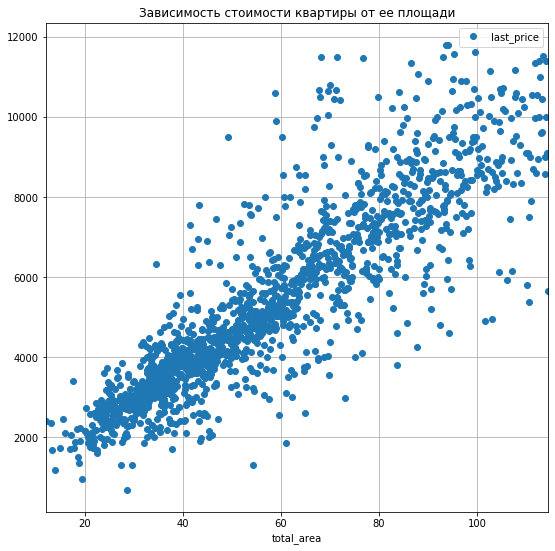

In [53]:
#построим диаграмму рассеяния для изучения влияния площади квартиры на стоимость

data_total_area_addiction = (
    data
    .pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(9, 9), title="Зависимость стоимости квартиры от ее площади")
     
)

#Выведем диаграмму на экран

plt.show()

In [54]:
#рассчитаем показатель корреляции площади и стоимости квартиры

data_total_area_corr = data.pivot_table(index='floor', values=['total_area', 'last_price']).corr()


#выведем показатели корреляции на экран

data_total_area_corr

,last_price,total_area
last_price,1.000000,0.905255
total_area,0.905255,1.000000


Исходя из построенного графика и показателей корреляции видно, что чем больше площадь квартиры, тем выше ее стоимость, что логично.

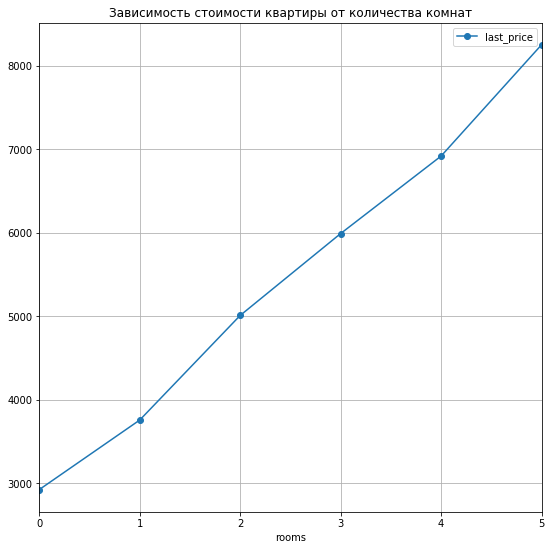

In [55]:
#построим график для изучения влияния количества комнат на стоимость

data_rooms_addiction = (
    data.pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(9, 9), title='Зависимость стоимости квартиры от количества комнат')
)
    
#выведем показатели корреляции на экран

plt.show()

In [56]:
#рассчитаем показатель корреляции количества комнат и стоимости квартиры

data_rooms_corr = data.pivot_table(index='floor', values=['rooms', 'last_price']).corr()

#выведем значение корелляции на экран

data_rooms_corr

,last_price,rooms
last_price,1.000000,0.551637
rooms,0.551637,1.000000


Исходя из графика зависимости количества комнат и стоимости квартиры, а также показателей корреляции, видно, что по аналогии с площадью квартиры, чем больше комнат, тем выше стоимость.

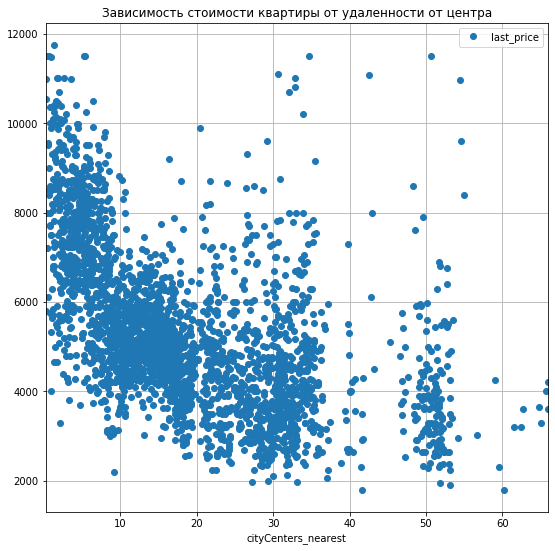

In [57]:
#построим диаграмму рассеяния для изучения влияния удаленности от центра на стоимость квартиры

data_cityCenters_nearest_addiction = (
    data.pivot_table(index='cityCenters_nearest', values='last_price')
    .plot(grid=True, style='o', figsize=(9, 9), title="Зависимость стоимости квартиры от удаленности от центра")
)
    
#выведем график на экран

plt.show()

In [58]:
#рассчитаем показатель корреляции стоимости квартиры и удаленности от центра

data_cityCenters_nearest_corr = data.pivot_table(index='floor', values=['cityCenters_nearest', 'last_price']).corr()

#выведем показатели на экран

data_cityCenters_nearest_corr

,cityCenters_nearest,last_price
cityCenters_nearest,1.000000,0.784421
last_price,0.784421,1.000000


Исходя из графика и показателей корреляции видно, что стоимость квартиры зависит от удаленности от центра: если квартира расположена в центре и в пределах 20 км от центра, то она дороже. Также встречаются единичные значения дорогих квартир дальше 30 км от города, вероятней всего это загородная недвижимость или элитная недвижимость.

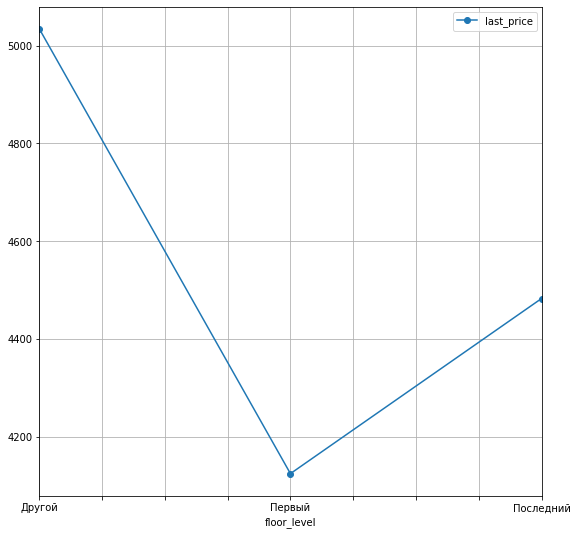

In [59]:
#построим график зависимости стоимости квартиры от этажа

data_floor_level_addiction = data.pivot_table(index='floor_level', values='last_price').plot(grid=True, style='o-', figsize=(9, 9))

#выведем график на экран

plt.show()


Из графика видно, что квартиры на первом этаже дешевле, квартиры на последнем этаже дешевле, чем на любом другом. Соответственно, самые дорогие квартиры - это те, которые расположены не на первом, не на последнем этаже.

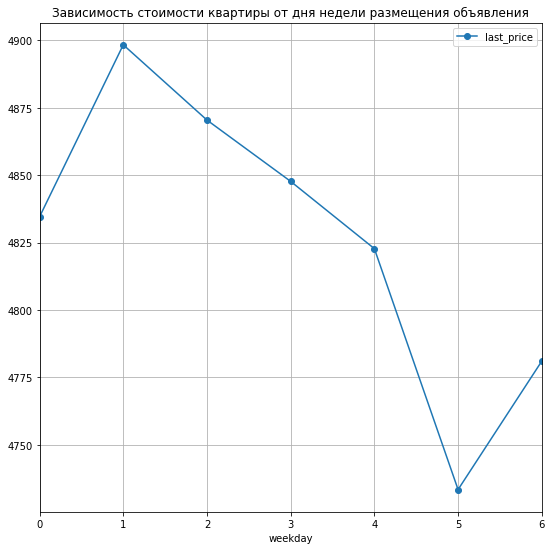

In [60]:
#построим график зависимости стоимости квартиры от дня недели размещения объявления

data_weekday_addiction = (
    data.pivot_table(index='weekday', values='last_price')
    .plot(grid=True, style='o-', figsize=(9, 9), title='Зависимость стоимости квартиры от дня недели размещения объявления')
)

#выведем график на экран

plt.show()

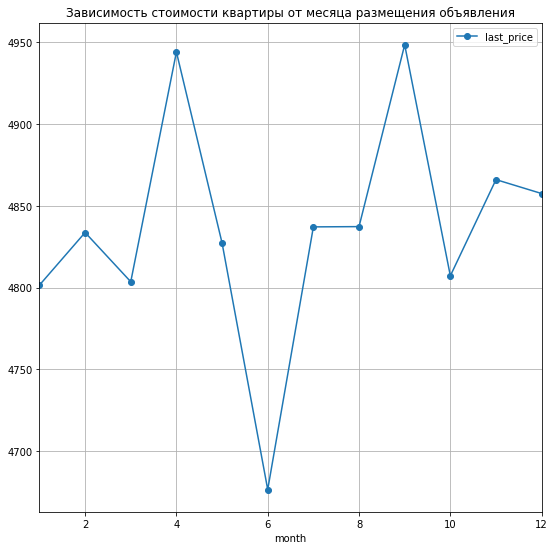

In [61]:
#построим график зависимости стоимости квартиры от месяца размещения объявления

data_month_addiction = (
    data.pivot_table(index='month', values='last_price')
    .plot(grid=True, style='o-', figsize=(9, 9), title='Зависимость стоимости квартиры от месяца размещения объявления')
)

#выведем график на экран

plt.show()

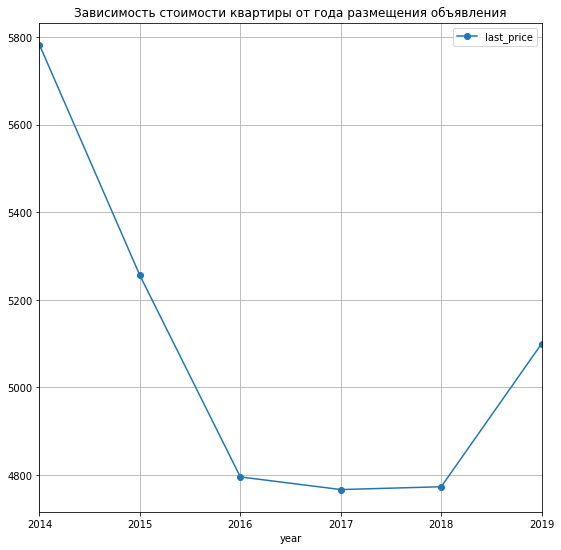

In [62]:
#построим график зависимости стоимости квартиры от года размещения объявления

data_year_addiction = (
    data.pivot_table(index='year', values='last_price')
    .plot(grid=True, style='o-', figsize=(9, 9), title='Зависимость стоимости квартиры от года размещения объявления')
)
 
#выведем график на экран    
    
plt.show()

Изучив данные о дате размещения объявлений о продаже квартир, можно сделать следующие выводы:

1. Дороже те квартиры, объявления о которых разместили во вторник, дешевле - в субботу.

2. Самые дорогие квартиры продаются в сентябре, дешевле всего квартиры продают в июне. Можно предположить, что летом обычно все в отпусках или на дачах, поэтому хотят продать квартиру быстрее и, возможно, охотнее идут на торг. Таким образом, квартиры в июне продаются дешевле.

3. Самые дорогие квартиры продавались в 2014 году, самые дешевые - в 2017 году. Начиная с 2018 года стоимость на квартиры начала повышаться. Вероятнее всего такая ситуация связана с мировым валютным кризисом 2014 года и в валютном отношении квартиры в 2014 году стоили дороже, чем, например в 2017.

Для оценки городов с самой высокой и низкой стоимостью жилья проанализируем данные в 10 городах с наибольшим количеством объявлений.

In [63]:
#отсортируем 10 городов с наибольшим количеством объявлений

cities_10 = data['locality_name'].value_counts().head(10)

#выведем полученные значения на экран

cities_10

Санкт-Петербург      15721
поселок Мурино         556
поселок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
поселок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

In [64]:
#сделаем срез городов с наибольшим количеством объявлений с указанием средней стоимости квартир 

sqm_price_local = data.query('locality_name in (@cities_10.index)').pivot_table(values='sqm_price', index='locality_name', aggfunc=['count','mean'])

#добавим два новых столбца в таблицу

sqm_price_local.columns = ['count','mean']

#округлим значения до целых

sqm_price_local = sqm_price_local.round()

#отсортируем данные по убыванию стоимости квадратного метра жилья

sqm_price_local.sort_values('count', ascending=False)


,count,mean
locality_name,,
Санкт-Петербург,15721,114849.0
поселок Мурино,556,85682.0
поселок Шушары,440,78677.0
Всеволожск,398,68654.0
Пушкин,369,103126.0
Колпино,338,75425.0
поселок Парголово,327,90176.0
Гатчина,307,68746.0
деревня Кудрово,299,92474.0


Как видно из анализа стоимости жилья в 10 городах, наиболее часто встречающихся в объявлениях видно, что самое дорогое жилье в Санкт-Петербурге - 114 849 руб./м. Чуть дешевле жилье в Пушкине, несмотря на то, что он удален от города примерно на 30 км. Скорее всего это вызвано тем, что в Пушкине много домов со статусом исторического наследия, а также из-за большого количества парков. Самое дешевое жилье во Всеволожске и Выборге. Вероятно это связано с достаточной удаленностью этих городов от Санкт-Петербурга (80 и 300 км) и транспортной доступностью. 

Далее для проведения анализа необходимо выделить квартиры в Санкт-Петербурге.

In [65]:
#выделим квартиры, находящиеся в Санкт-Петербурге

data_spb = data.query('locality_name == "Санкт-Петербург"')

#переведем значения удаленности от центра в целочисленные

data['cityCenters_nearest'] = data['cityCenters_nearest'].astype(int)

#рассчитаем среднюю стоимость квадратного метра жилья для каждого километра удаленности от центра

data_spb_price_avr = data_spb.groupby('cityCenters_nearest')['sqm_price'].mean().round()

#выведем результат на экран

data_spb_price_avr

cityCenters_nearest
0.18     195591.0
0.21     172619.0
0.22     109900.0
0.29      95059.0
0.32     424000.0
           ...   
28.64     85191.0
28.81     79890.0
29.26     56527.0
29.34     73944.0
29.49     56977.0
Name: sqm_price, Length: 1920, dtype: float64

Как и ожидалось, в основном, чем ближе жилье к центру, тем дороже. Есть выбивающиеся значения на расстоянии 27 км. Скорее всего это жилье Курортного район (Зеленогорска), где в основном дорогое и элитное жилье из-за близости к заливу.

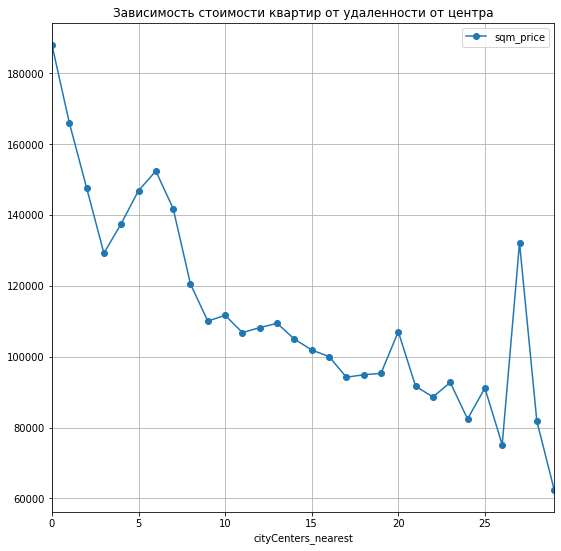

In [66]:
#построим график зависимости стоимости жилья от удаленности от центра

data_spb_cityCenter_nearest = (
    data
    .query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='cityCenters_nearest', values='sqm_price').plot(grid=True, style='o-', xlim=(0,29), figsize=(9,9),title = 'Зависимость стоимости квартир от удаленности от центра')
)

#выведем график на экран

plt.show()

Исходя из графика видно, что на отметке 3 км график резко меняет направление. Поэтому, за границу центра возьмем 3 км. После отметки в 3 км кривая на графике показывает рост, что, вероятно связано, со стоимостью жилья в немногочисленных новостройках в центре города.

Далее проанализируем квартиры в центре города.

In [67]:
#выделим квартиры, находящиеся в центре города

spb_city_center = data_spb.query('cityCenters_nearest <= 8')

In [68]:
#рассчитаем среднюю площадь квартир в центре, округлим значение до целого

spb_city_center_total_area_avr = spb_city_center['total_area'].mean().round()

#выведем полученное значение на экран

print('Средняя общая площадь квартиры в центре Санкт-Петербурга составляет:', spb_city_center_total_area_avr, 'кв.м')

Средняя общая площадь квартиры в центре Санкт-Петербурга составляет: 69.0 кв.м


In [69]:
#рассчитаем среднюю площадь квартир в центре, округлим значение до целого

spb_total_area_avr = data_spb['total_area'].mean().round()

#выведем полученное значение на экран

print('Средняя общая площадь квартиры в Санкт-Петербурге составляет:',spb_total_area_avr, 'кв.м')

Средняя общая площадь квартиры в Санкт-Петербурге составляет: 57.0 кв.м


In [70]:
#рассчитаем среднюю стоимость квартир в центре, переведем значения в руб., округлим значение до целого

spb_city_center_last_price_avr = (spb_city_center['last_price'].mean()*1000).round()
#выведем полученное значение на экран

print('Средняя стоимость квартиры в центре Санкт-Петербурга составляет:', spb_city_center_last_price_avr, 'руб.')

Средняя стоимость квартиры в центре Санкт-Петербурга составляет: 7386245.0 руб.


In [71]:
#рассчитаем среднюю стоимость квартир в Санкт-Петербурге, переведем значения в руб., округлим значение до целого

spb_last_price_avr = (data_spb['last_price'].mean()*1000).round()

#выведем полученное значение на экран

print('Средняя стоимость квартиры в Санкт-Петербурге составляет:', spb_last_price_avr, 'руб.')

Средняя стоимость квартиры в Санкт-Петербурге составляет: 5663713.0 руб.


In [72]:
#рассчитаем среднее количество комнат в квартирах в центре Санкт-Петербурга, округлим значение до целого

spb_city_center_rooms_avr = spb_city_center['rooms'].mean().round()

#выведем полученное значение на экран

print('Среднее количество комнат в квартирах в центре Санкт-Петербурга составляет:', spb_city_center_rooms_avr)

Среднее количество комнат в квартирах в центре Санкт-Петербурга составляет: 3.0


In [73]:
#рассчитаем среднее количество комнат в квартирах в Санкт-Петербурге, округлим значение до целого

spb_rooms_avr = data_spb['rooms'].mean().round()

#выведем полученное значение на экран

print('Среднее количество комнат в квартирах в Санкт-Петербурге составляет:', spb_rooms_avr)

Среднее количество комнат в квартирах в Санкт-Петербурге составляет: 2.0


In [74]:
#рассчитаем среднее значение высоты потолков в квартирах в центре Санкт-Петербурга, округлим значение до сотых

spb_city_center_ceiling_height_avr = spb_city_center['ceiling_height'].mean().round(2)

#выведем полученное значение на экран

print('Средняя высота потолков в квартирах в центре Санкт-Петербурга составляет:', spb_city_center_ceiling_height_avr, 'м')

Средняя высота потолков в квартирах в центре Санкт-Петербурга составляет: 2.66 м


In [75]:
#рассчитаем среднее значение высоты потолков в квартирах Санкт-Петербурга, округлим значение до сотых

spb_ceiling_height_avr = data_spb['ceiling_height'].mean().round(2)

#выведем полученное значение на экран

print('Средняя высота потолков в квартирах Санкт-Петербурга составляет:', spb_ceiling_height_avr, 'м')

Средняя высота потолков в квартирах Санкт-Петербурга составляет: 2.64 м


Проанализировав данные о недвижимости в центре города можно сделать следующие выводы:

1. Средняя площадь квартир в центре составляет 73 кв.м., в городе - 57 кв.м. Это связано с тем, что жилой фонд в центре исторический, с просторными квартирами. В основном это бывшие коммунальные квартиры или элитное жилье. Чем дальше от центра, тем разнообразнее дома: сталинки, хрущевки, современная застройка, где, как правило, площадь квартир скромнее.

2. Ожидаемо, что в центре стоимость жилья на 2,2 млн руб. выше, чем в целом по городу (7,87 млн руб. и 5,66 млн руб. соответственно). Причины все те же: расположение, исторические или элитные дома с просторными квартирами.

3. В центре чаще продаются квартиры с 3 комнатами, в целом по городу - с 2. Ситуация аналогична, как и с площадью квартир.

4. Высота потолков в квартирах в центре города выше на 10 см, по сравнению с квартирами в целом по городу (2,81 м и 2,71 м соответственно). Причиной этого являются опять же характер застройки (жилой фонд в центре города с потолками выше, чем в относительно новых домах).

Дополнительно изучим влияние на стоимость жилья в центре города и в целом по городу следующих факторов: число комнат, этаж, удаленность от центра, дата размещения объявления.

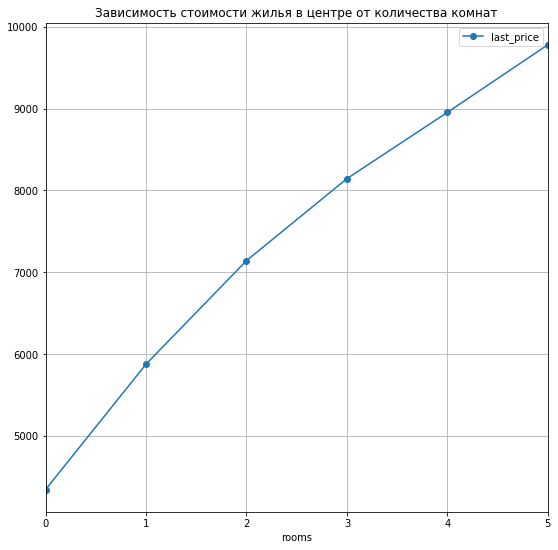

In [76]:
#построим график зависимости стоимости жилья в центре города от количества комнат

center_last_price_rooms_corr = (
    spb_city_center
    .pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(9, 9), title="Зависимость стоимости жилья в центре от количества комнат")
)
    
#выведем график на экран

plt.show()

In [77]:
#рассчитаем зависимость стоимости квартиры в центре города от площади

center_total_area_corr = spb_city_center.pivot_table(index='floor', values=['total_area', 'last_price']).corr()

#выведем результат на экран

center_total_area_corr

,last_price,total_area
last_price,1.000000,0.609029
total_area,0.609029,1.000000


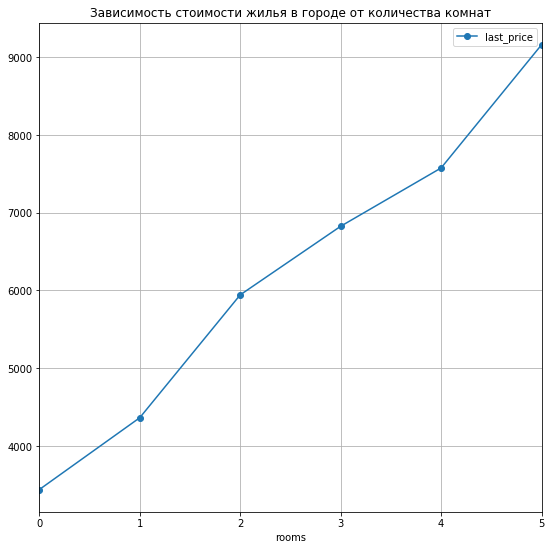

In [78]:
#построим график зависимости стоимости жилья в городе от количества комнат

spb_last_price_rooms_corr = (
    data_spb
    .pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(9, 9), title="Зависимость стоимости жилья в городе от количества комнат")
)
    
#выведем график на экран

plt.show()

In [79]:
#рассчитаем зависимость стоимости квартиры в городе от площади

spb_total_area_corr = data_spb.pivot_table(index='floor', values=['total_area', 'last_price']).corr()

#выведем результат на экран

spb_total_area_corr

,last_price,total_area
last_price,1.000000,0.913116
total_area,0.913116,1.000000


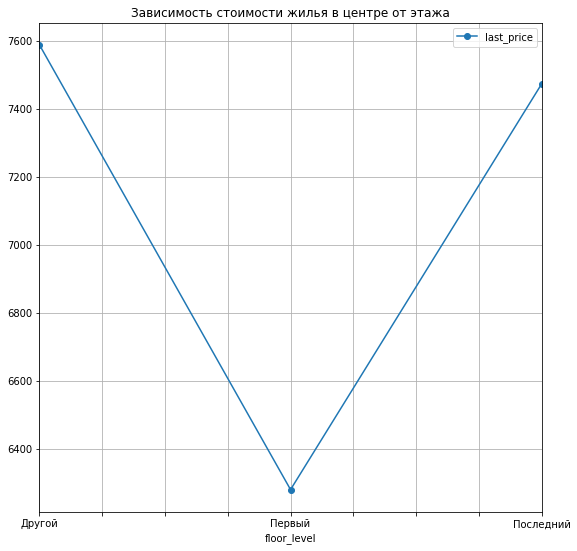

In [80]:
#построим график зависимости стоимости жилья в центре города от этажа

center_last_price_floor_corr = (
    spb_city_center
    .pivot_table(index='floor_level', values='last_price').plot(grid=True, style='o-', figsize=(9, 9), title="Зависимость стоимости жилья в центре от этажа")
)
    
#выведем график на экран

plt.show()

In [81]:
#рассчитаем зависимость стоимости квартиры в центре города от этажа

center_floor_level_corr = spb_city_center.pivot_table(index='floor', values=['floor_level', 'last_price']).corr()

#выведем результат на экран

center_floor_level_corr

,last_price
last_price,1.0


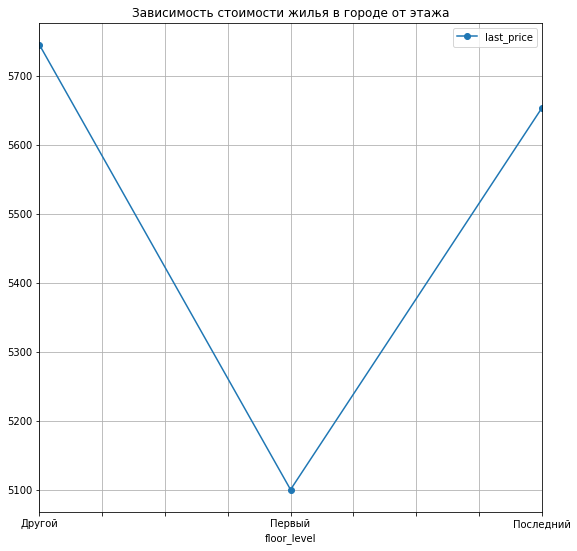

In [82]:
#построим график зависимости стоимости жилья в городе от этажа

spb_last_price_floor_corr = (
    data_spb
    .pivot_table(index='floor_level', values='last_price').plot(grid=True, style='o-', figsize=(9, 9), title="Зависимость стоимости жилья в городе от этажа")
)
    
#выведем график на экран

plt.show()

In [83]:
#рассчитаем зависимость стоимости квартиры в городе от этажа

spb_floor_level_corr = data_spb.pivot_table(index='floor', values=['floor_level', 'last_price']).corr()

#выведем результат на экран

spb_floor_level_corr

,last_price
last_price,1.0


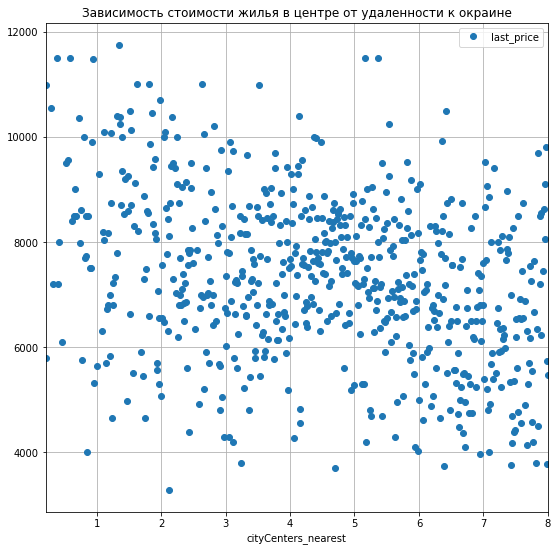

In [84]:
#построим график зависимости стоимости жилья в центре города от удаленности к окраине

center_last_price_center_nearest_corr = (
    spb_city_center
    .pivot_table(index='cityCenters_nearest', values='last_price').plot(grid=True, style='o', figsize=(9, 9), title="Зависимость стоимости жилья в центре от удаленности к окраине")
)
    
#выведем график на экран

plt.show()

In [85]:
#рассчитаем зависимость стоимости квартиры в центре города от удаленности к окраине

center_cityCenters_nearest_corr = spb_city_center.pivot_table(index='floor', values=['cityCenters_nearest', 'last_price']).corr()

#выведем результат на экран

center_cityCenters_nearest_corr 

,cityCenters_nearest,last_price
cityCenters_nearest,1.000000,0.094129
last_price,0.094129,1.000000


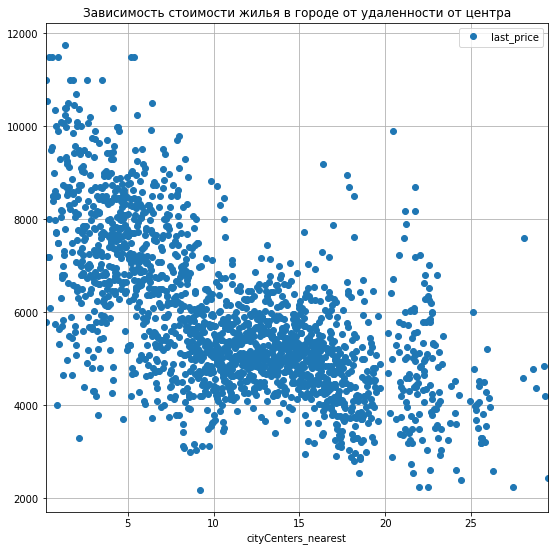

In [86]:
#построим график зависимости стоимости жилья в городе от удаленности от центра

spb_price_center_nearest_corr = (
    data_spb
    .pivot_table(index='cityCenters_nearest', values='last_price').plot(grid=True, style='o', figsize=(9, 9), title="Зависимость стоимости жилья в городе от удаленности от центра")
)
    
#выведем график на экран

plt.show()

In [87]:
#рассчитаем зависимость стоимости квартиры в городе от удаленности от центра

spb_cityCenters_nearest_corr = data_spb.pivot_table(index='floor', values=['cityCenters_nearest', 'last_price']).corr()

#выведем результат на экран

spb_cityCenters_nearest_corr

,cityCenters_nearest,last_price
cityCenters_nearest,1.000000,0.749428
last_price,0.749428,1.000000


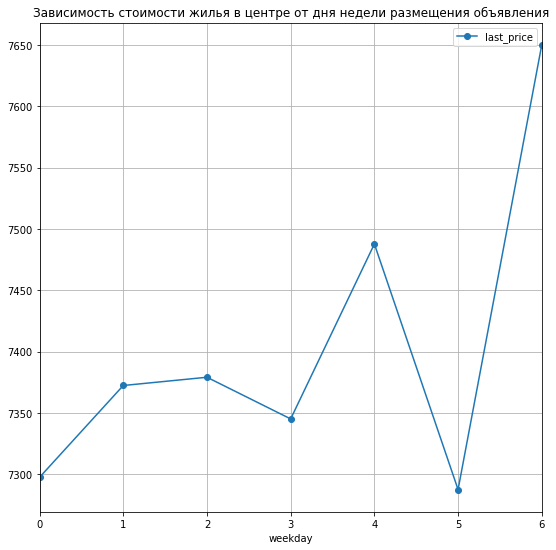

In [88]:
#построим график зависимости стоимости жилья в центре города от дня недели размещения объявления

center_last_price_weekday_corr = (
    spb_city_center
    .pivot_table(index='weekday', values='last_price').plot(grid=True, style='o-', figsize=(9, 9), title="Зависимость стоимости жилья в центре от дня недели размещения объявления")
)
    
#выведем график на экран

plt.show()

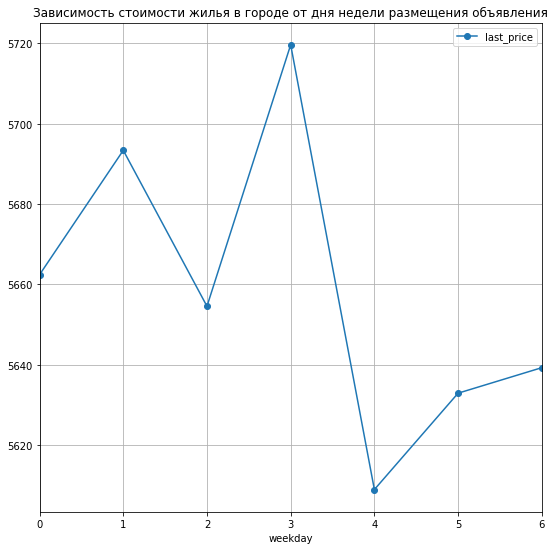

In [89]:
#построим график зависимости стоимости жилья в городе от дня недели размещения объявления

spb_last_price_weekday_corr = (
    data_spb
    .pivot_table(index='weekday', values='last_price').plot(grid=True, style='o-', figsize=(9, 9), title="Зависимость стоимости жилья в городе от дня недели размещения объявления")
)
    
#выведем график на экран

plt.show()

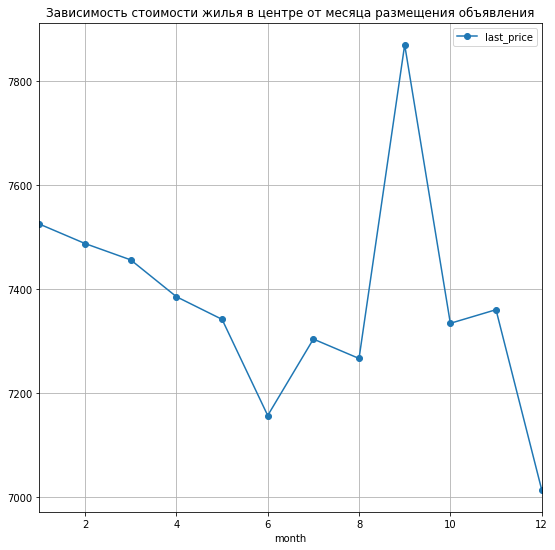

In [90]:
#построим график зависимости стоимости жилья в центре города от месяца размещения объявления

center_last_price_month_corr = (
    spb_city_center
    .pivot_table(index='month', values='last_price').plot(grid=True, style='o-', figsize=(9, 9), title="Зависимость стоимости жилья в центре от месяца размещения объявления")
)
    
#выведем график на экран

plt.show()

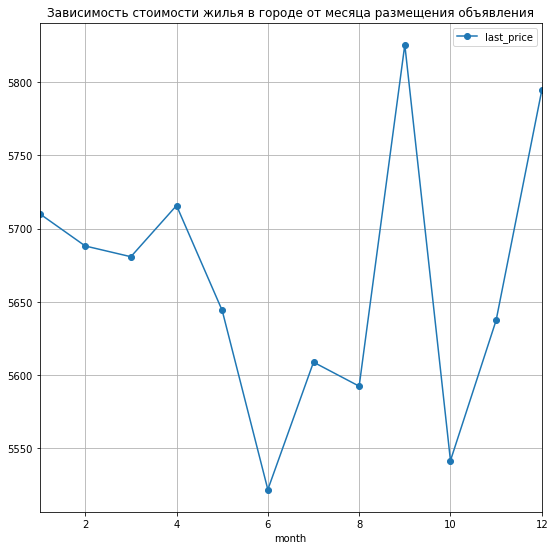

In [91]:
#построим график зависимости стоимости жилья в городе от месяца размещения объявления

spb_last_price_month_corr = (
    data_spb
    .pivot_table(index='month', values='last_price').plot(grid=True, style='o-', figsize=(9, 9), title="Зависимость стоимости жилья в городе от месяца размещения объявления")
)
    
#выведем график на экран

plt.show()

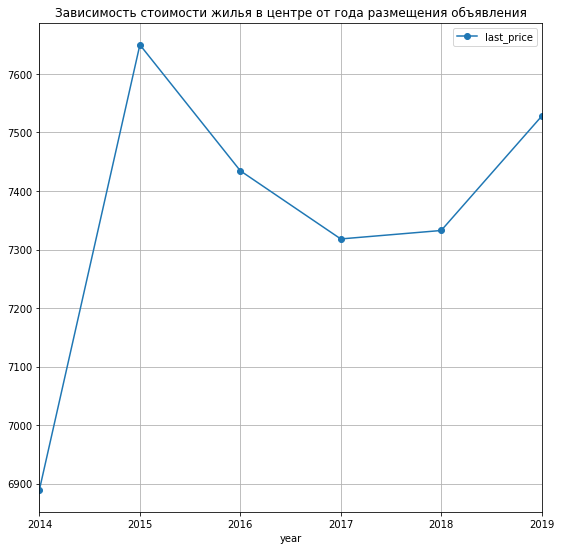

In [92]:
#построим график зависимости стоимости жилья в центре города от года размещения объявления

center_last_price_year_corr = (
    spb_city_center
    .pivot_table(index='year', values='last_price').plot(grid=True, style='o-', figsize=(9, 9), title="Зависимость стоимости жилья в центре от года размещения объявления")
)
    
#выведем график на экран

plt.show()

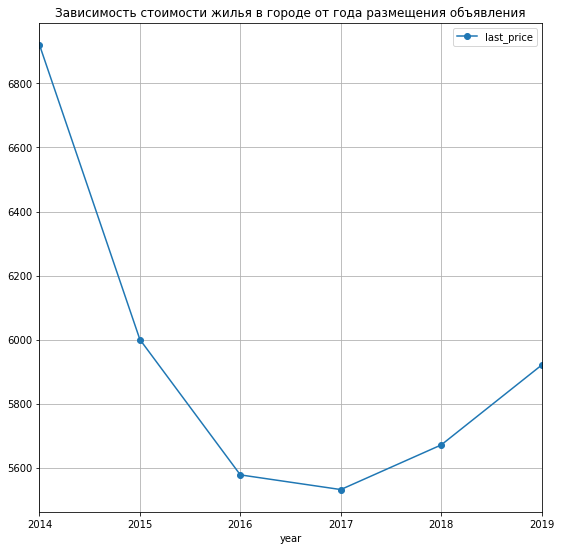

In [93]:
#построим график зависимости стоимости жилья в городе от года размещения объявления

spb_last_price_year_corr = (
    data_spb
    .pivot_table(index='year', values='last_price').plot(grid=True, style='o-', figsize=(9, 9), title="Зависимость стоимости жилья в городе от года размещения объявления")
)
    
#выведем график на экран

plt.show()

Изучив данные о количестве комнат, этаже, удаленности от центра и дате размещения, и влиянии этих факторов на стоимость квартир и времея продажи, можно сделать следующие выводы:

1. Чем больше количество комнат, тем выше стоимость жилья, как в центре, так и в целом по городу.


2. В центре самые дорогие квартиры на последнем этаже, в городе - на любом, кроме первого и последнего. Вероятно это связано с тем, что в центре есть достаточное количество домов с мансардными квартирами на последнем этаже. Квартиры на первом этаже самые дешевые как в центре, так и в целом по городу.


3. В центре в радиусе 3 км квартиры стоят одинаково дорого. Квартиры, которые удалены от центра на 3 и более км дешевеют с возрастанием удаленности. Есть единичные значения в районе 20-25 км от города с дорогими квартирами, что связано с наличием там элитной и загородной недвижимости.


4. Что касается времени размещения, тут тенденция такая: в центре реже продаются квартиры, объявления о продаже которых разместили в четверг, чаще - в среду. В целом по городу чаще продаются квартиры, о продаже которых стало известно в пятницу, реже - в четверг. Если говорить о месяце размещения объявления, то в центре чаще продаются квартиры, объявления о продаже которых разместили в мае, реже в ноябре. В городе: чаще - в сентябре, реже - в июне. Недвижимость в центре чаще покупали по объявлениям, размещенным в 2019 году, реже - в 2018. В городе: чаще - в 2014 году, реже - в 2017. При  этом спрос на жилье в центре начал резко расти в 2018 году, в то время как в городе также в 2018 году отмечается начало плавного роста спроса на покупку недвижимости. Предположительно это связано с благоприятной экономической обстановкой в 2018 году после мирового валютного кризиса 2014 года.



## Общий вывод

В ходе изучения информации из объявлений о продаже квартир в Санкт-Петербурге и Ленинградской области были замечены следующие закономерности, которые необходимо учитывать при построении автоматизированной системы, отслуживающей аномалии и предотвращающей мошеннические действия:

Как и в центре Санкт-Петербурга, так и в целом по городу, на стоимость квартиры существенно влияют следующие факторы:

1.1 ***Площадь квартиры***

Логично, что чем больше квартира, тем выше ее стоимость. Здесь стоит отметить, что средняя площадь продаваемой в центре города квартиры на 16 кв. м больше, чем в целом по городу (73 кв.м и 57 кв.м соответственно). Следовательно, стоимость кварти р в центре также выше на 2,21 млн руб.: 7,87 млн руб. против 5,66 млн руб. в целом по городу. Это связано с тем, что в центре города преобладает застройка исторически значимыми домами с просторными квартирами, а также элитным жильем, в то время как в целом по городу выбор домов шире: сталинки, хрущевки, современные новостройки.


1.2  ***Количество комнат***

Ожидаемо, что чем больше комнат, тем выше стоимость жилья по аналогии с площадью квартиры. В центре города среднее количество комнат в продаваемых квартирах - 3, в целом по городу - 2. Стоимость однокомнатной квартиры в центре может достигать 6 млн руб., в целом по городу - до 5 млн руб. Двухкомнатная квартира в центре может обойтись покупателям в сумму до 7,5 млн руб., в целом по городу этот показатель ниже - до 6 млн руб. Трехкомнатная квартира в центре может стоить до 8,5 млн руб., по городу - до 6,8 млн руб. Такая тенденция ценообразования также связана с территориальным расположением и характером застройки, как и в случае с площадью квартиры.


1.3 ***Этажность***

Интересная ситуация складывается с тем, на каком этаже расположена квартира. Как в центре, так и в удаленности от него самыми недорогими квартирами являются те, которые расположены на первом этаже (6,5 млн руб. и 5,1 млн руб. соответственно). Самыми дорогими квартирами в центре являются те, которые расположены на последнем этаже (8,15 млн руб.). Предположительно, это  связано с тем, что в центре достаточно много домов с мансардными квартирами на последнем этаже. В целом по городу квартиры на последнем этаже не пользуются такой популярностью и самыми дорогими являются те, которые расположены не на первом, не на последнем этаже. Их стоимость может колебаться от 5,1 до 5,75 млн руб.

1.4 ***Удаленность от центра***

Безусловно, удаленность от центра оказывает существенное влияние на стоимость квартиры: чем ближе к центру (в радиусе 3 км), тем дороже квартира. В радиусе 3 км от центра города стоимость квартир составляет от 4 до 11,7 млн руб., свыше 3 км от центра - стоимость плавно снижается и достигает минимальной отметки в 2,2 млн руб. на отметке в 8 км от центра. При этом стоит отметить, что на удленности в 20-25 км от центра встречаются варианты продажи дорогих квартир, чья стоимость колеблется от 8,8 до 9,9 млн руб. Вероятно, это квартиры в Курортном районе города, например, в Зеленогорске, где расположено элитное жилье, а также жилье с видом на Финский Залив.


1.5 ***Год размещения объявления***

Также существенное влияние на стоимость квартир оказаль год размещения объявлений. Для квартир в центре годом с самыми дорого продаваемыми квартирами стал 2016, стоимость квартир достигла 8,5 млн руб. В целом по городу самые дорогие квартиры продавались в 2014 году (до 6,9 млн руб.). Предположительно, такая ситуация связана с валютным кризисом 2014 года: накануне цены на квартиры в городе достигли максимума в то время, как квартиры в центре подорожали в 2016 году с постепенной стабилизацией ситуации на валютных рынках. Самые низкие цены на квартиры в центре и в городе зафиксированы в 2018 и 2017 гг. (7,55 млн руб. и 5,5 млн руб. соответственно). Примечательно что с 2017-2018 гг. наблюдается рост стомости на жилье как в центре, так и в целом по городу, что связано с улучшением экономической ситуации после кризиса 2014 г.



Меньшее влияние на стоимость квартир оказали такие факторы, как ***месяц размещения объявления и день недели***. В центре квартиры, объявления о продаже которых размещались в среду, продавлись дороже, чем те, объявления о продаже которых размещались в четверг. Ситуация по городу немного отличается: дороже продавались квартиры, начало продаж которых стартовало в пятницу, дешевле - в четверг. С точки зрения аналитики не думаю, что эти факторы можно как-то связать и назвать оказывающими сильное влияние. Что же касается месяца, то тут квартиры в центре и в целом по городу продаются дороже в теплые месяцы - май и сентябрь соответственно. Возможно это связано с тем, что летом и в начале осени чаще всего сезон отпусков и покупатели желают решить вопрос за лето, чтобы начать ремонт, переехать и т.д. Дешевле всего квартиры в центре продаются в ноябре,а  в городе - в июне. Что касается недорогой стоимости квартир в городе в июне, предположу, что в этом месяце предложений на рынке недвижимости больше, чем в целом за год и, опять же, из-за отпусков, возможно, продавцы охотнее идут на торг, чтобы продать квартиру быстрее.

В целом стоит отметить, что все факторы имеют аномальные значения, которые необходимо изучать и исключать из анализа, чтобы получить максимально точный результат работы автоматизированной системы.

При построении атоматизированной системы стоит учесть следующие параметры:

1. Площадь квартиры. При этом необходимо помнить о том, что квартиры в центре просторнее, что связано с характером застройки.

2. Количество комнат. Этот параметр оказывает существенное влияние на стоимость квартир наравне с площадью. При этом количество комнат в квартирах в центре может быть меньше, чем в городе, но площадь больше, что не является ошибкой или уловкой мошенников. Это особенность жилого фонда в центре города.

3. Этажность. Важно учитывать этот параметр, поскольку он имеет прямое влияние на стоимость квартиры. Особенностью здесь является то, что квартиры на последнем этаже в центре города являются самыми дорогими по стоимости. Это не случайность и не аномалия. Как и говорилось ранее, это связано с наличием квартир с мансардами или выходом на крышу. Квартиры на первом этаже не пользуются популярностью ни в центре города, ни в пределах города, ни за городом.

4. Удаленность от центра. Квартиры в центре дороже, чем те, которые удалены от центра. При этом центральной зоной стоит считать территорию в радиусе 8 км от центра. Также стоит отметить, что есть ряд квартир в пределах 25-30 км от города в элитных районах (Курортный) с видом на Финский залив, чья стоимость достигает стоимости квартир в центре. Это не является признаком мошенничества или аномалии.

4. Год размещения объявления. Данный параметр важен и напрямую связан с макроэкономическими факторами (курсы валют, мировые финансовые кризисы и т.п.), поэтому их важно учитывать.

Остальные параметры, такие как день недели размещения объявления и месяц не влияют на стоимость квартиры линейно, поэтому нельзя сделать вывод о том, что есть какая-либо закономерность между этими параметрами и повышением или снижением стоимости недвижимости.
